# INTRADAY STOCK TRADING PREDICTION USING DEEP LEARNING
- **Performed by - Isha Singh**
- **Model used - GRU**
- **Dataset - Data Frame (minute wise)**


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
#Uploading the dataset
data = pd.read_csv('DataFrame.csv',index_col='Date',parse_dates=['Date'])

In [4]:
data.head()

,Type,Time,open,high,low,close,Unnamed: 7
Date,,,,,,,
2021-01-01,NIFTY,09:16,13997.90,14020.85,13991.35,14013.15,NaN
2021-01-01,NIFTY,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2021-01-01,NIFTY,09:18,14008.05,14013.10,14005.05,14012.70,NaN
2021-01-01,NIFTY,09:19,14013.65,14019.10,14013.65,14016.20,NaN
2021-01-01,NIFTY,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22805 entries, 2021-01-01 to 2021-03-31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Time        22805 non-null  object 
 2   open        22805 non-null  float64
 3   high        22805 non-null  float64
 4   low         22805 non-null  float64
 5   close       22805 non-null  float64
 6   Unnamed: 7  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


## Dropping unnecessary column
We see that the **'Unnamed: 7'** column contains no values and is unnecessay, Hence we drop it.

In [6]:
data.drop('Unnamed: 7',inplace=True,axis=1)

In [7]:
data['Type'].nunique()

1

We see that there is **only one unique value in the Type column i.e. NIFTY.** So we don't need that for our analysis. Hence, we drop it.

In [8]:
data.drop('Type',inplace=True,axis=1)

## Summary of the data

In [9]:
data.describe()

,open,high,low,close
count,22805.000000,22805.000000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816
std,391.377498,391.265231,391.551643,391.366248
min,13604.750000,13614.400000,13596.750000,13602.800000
25%,14462.250000,14465.950000,14458.050000,14461.950000
50%,14739.500000,14743.000000,14735.850000,14739.450000
75%,15037.000000,15041.250000,15032.500000,15036.850000
max,15429.500000,15431.750000,15427.900000,15430.200000


## Checking for null values

In [10]:
data.isnull().sum()

Time     0
open     0
high     0
low      0
close    0
dtype: int64

## Checking for duplicate values

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(22805, 5)

## Checking the type of the data

In [13]:
type(data.Time[0])

str

In [14]:
# Converting Time column from str to datetime type
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
data['month'] = pd.to_datetime(data['Time']).dt.month
data['Time'] = pd.to_datetime(data['Time']).dt.time


In [15]:
data

,Time,open,high,low,close,Hour,month
Date,,,,,,,
2021-01-01,09:16:00,13997.90,14020.85,13991.35,14013.15,9,6
2021-01-01,09:17:00,14014.85,14018.55,14008.15,14009.05,9,6
2021-01-01,09:18:00,14008.05,14013.10,14005.05,14012.70,9,6
2021-01-01,09:19:00,14013.65,14019.10,14013.65,14016.20,9,6
2021-01-01,09:20:00,14015.45,14017.80,14011.95,14015.45,9,6
...,...,...,...,...,...,...,...
2021-03-31,15:27:00,14687.35,14694.35,14686.30,14690.60,15,6
2021-03-31,15:28:00,14690.90,14690.90,14686.05,14689.30,15,6
2021-03-31,15:29:00,14690.30,14694.10,14688.55,14691.30,15,6


**Again, checking the type of the 'Time' column**

In [16]:
type(data['Time'][0])

datetime.time

## Data Visualisation

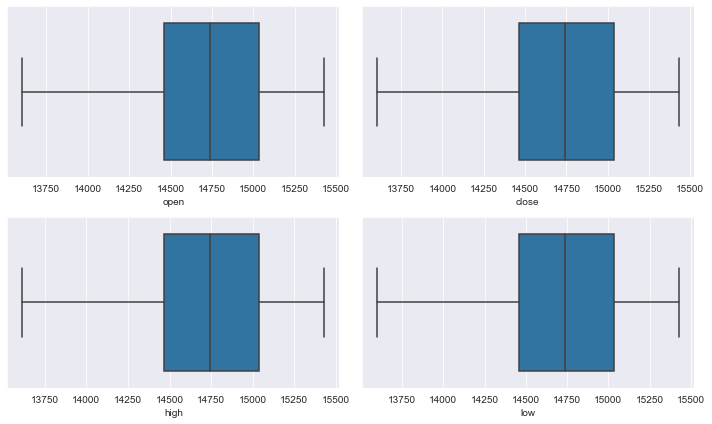

In [17]:
fig = plt.figure(figsize=(10,6))
plt.subplot(221)
sns.boxplot(x=data['open'])
plt.subplot(222)
sns.boxplot(x=data['close'])
plt.subplot(223)
sns.boxplot(x=data['high'])
plt.subplot(224)
sns.boxplot(x=data['low'])
plt.tight_layout()

As we can see from the above graph, **there are no outliers present.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='close'>

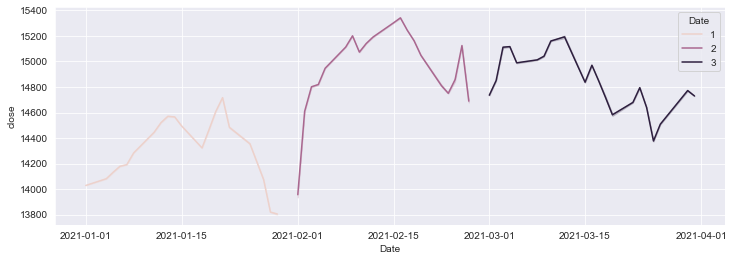

In [18]:
plt.figure(figsize=(12,4))
sns.lineplot(data.index,data['close'],hue=data.index.month)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='high'>

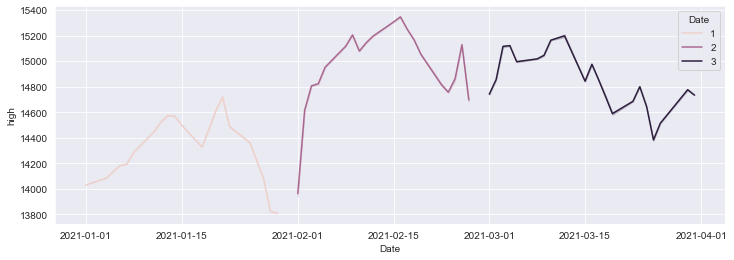

In [19]:
plt.figure(figsize=(12,4))
sns.lineplot(data.index,data['high'],hue=data.index.month)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='low'>

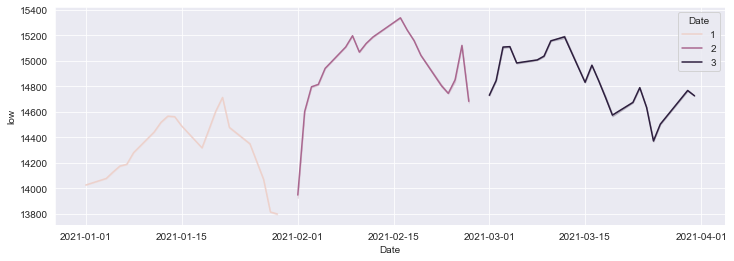

In [20]:
plt.figure(figsize=(12,4))
sns.lineplot(data.index,data['low'],hue=data.index.month)

## We can conclude the following from the above graph:
1. The closing prices fall at the end of each month and takes a leap at the start of the next month
2. The prices reaches peak twice in each month.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='open'>

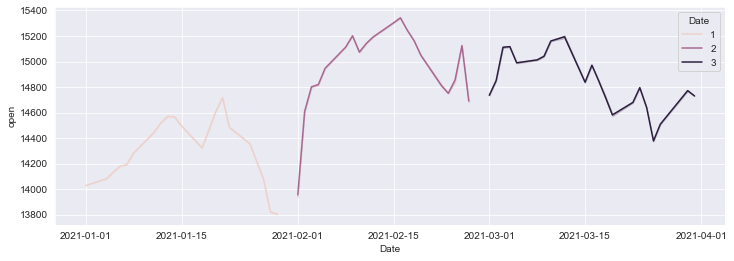

In [21]:
plt.figure(figsize=(12,4))
sns.lineplot(data.index,data['open'],hue=data.index.month)

**We see a similar trend in the opening prices.**

## Range of the data

In [22]:
range_open=data['open'].max()-data['open'].min()
print("The range of open is : {}".format(range_open))
range_high=data['high'].max()-data['high'].min()
print("The range of high is : {}".format(range_high))
range_low=data['low'].max()-data['low'].min()
print("The range of low is : {}".format(range_low))
range_close=data['close'].max()-data['close'].min()
print("The range of close is : {}".format(range_open))

The range of open is : 1824.75
The range of high is : 1817.3500000000004
The range of low is : 1831.1499999999996
The range of close is : 1824.75


## Correlation of the columns

In [23]:
data_corr = data.corr()

<AxesSubplot:>

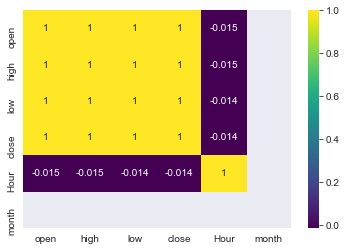

In [24]:
sns.heatmap(data_corr,annot=True,cmap='viridis')

## Insights from the graph:
1. Open, Close, High and low are strongly correlated.
2. Hour is negetively correlated with open, close, high and low

# Building the Model

We will start by predicting the close price.

In [25]:
df1 = data.reset_index()['close']

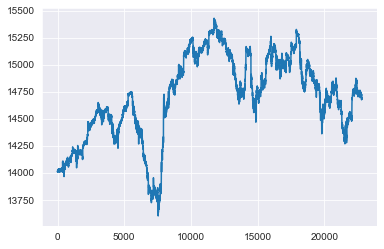

In [26]:
#Let us take a look at the close column once.
plt.plot(df1)

In [27]:
#GRU is sensitive to the scale of the data, so we apply MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
print(df1)

[[0.22455401]
 [0.22231039]
 [0.22430776]
 ...
 [0.59565503]
 [0.59661267]
 [0.59532669]]


In [29]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(14823, 7982)

In [31]:
len(train_data),len(test_data)

(14823, 7982)

In [32]:
train_data

array([[0.22455401],
       [0.22231039],
       [0.22430776],
       ...,
       [0.5821112 ],
       [0.58287731],
       [0.58755609]])

In [33]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(14722, 100)
(14722,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(7881, 100)
(7881,)


(None, None)

In [37]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [39]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
99/99 [==============================] - 90s 482ms/step - loss: 0.0805
Epoch 2/50
99/99 [==============================] - 49s 490ms/step - loss: 0.0220
Epoch 3/50
99/99 [==============================] - 48s 484ms/step - loss: 0.0098
Epoch 4/50
99/99 [==============================] - 49s 490ms/step - loss: 0.0057
Epoch 5/50
99/99 [==============================] - 48s 489ms/step - loss: 0.0048
Epoch 6/50
99/99 [==============================] - 49s 493ms/step - loss: 0.0043
Epoch 7/50
99/99 [==============================] - 49s 496ms/step - loss: 0.0040
Epoch 8/50
99/99 [==============================] - 49s 497ms/step - loss: 0.0038
Epoch 9/50
99/99 [==============================] - 49s 498ms/step - loss: 0.0037
Epoch 10/50
99/99 [==============================] - 49s 497ms/step - loss: 0.0034
Epoch 11/50
99/99 [==============================] - 49s 497ms/step - loss: 0.0034
Epoch 12/50
99/99 [==============================] - 49s 491ms/step - loss: 0.0033
Epoch 13/50
9

In [40]:
### Lets Do the prediction and check performance metrics
train_predict_close=regressorGRU.predict(X_train)
test_predict_close=regressorGRU.predict(X_test)

In [42]:
##Transformback to original form
train_predict_close=scaler.inverse_transform(train_predict_close)
test_predict_close=scaler.inverse_transform(test_predict_close)

In [44]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_close))

14636.71558034222

In [45]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict_close))

14838.285263633908

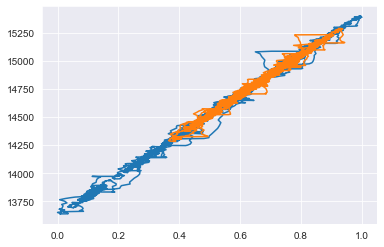

In [48]:
#plotting the predictions
plt.plot(y_train,train_predict_close)
plt.plot(ytest,test_predict_close)

## Model for high prices

In [50]:
df2 = data.reset_index()['high']

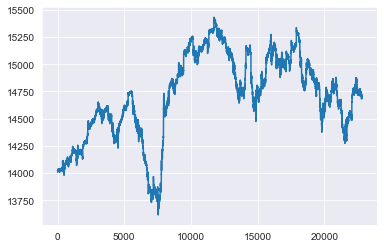

In [51]:
plt.plot(df2)

In [52]:
#GRU is sensitive to the scale of the data, so we apply MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [53]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [54]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [55]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [56]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
99/99 [==============================] - 64s 490ms/step - loss: 0.0889
Epoch 2/50
99/99 [==============================] - 48s 489ms/step - loss: 0.0246
Epoch 3/50
99/99 [==============================] - 48s 485ms/step - loss: 0.0109
Epoch 4/50
99/99 [==============================] - 48s 485ms/step - loss: 0.0058
Epoch 5/50
99/99 [==============================] - 48s 487ms/step - loss: 0.0047
Epoch 6/50
99/99 [==============================] - 49s 492ms/step - loss: 0.0044
Epoch 7/50
99/99 [==============================] - 48s 488ms/step - loss: 0.0041
Epoch 8/50
99/99 [==============================] - 50s 500ms/step - loss: 0.0038
Epoch 9/50
99/99 [==============================] - 50s 506ms/step - loss: 0.0037
Epoch 10/50
99/99 [==============================] - 50s 507ms/step - loss: 0.0033
Epoch 11/50
99/99 [==============================] - 51s 510ms/step - loss: 0.0033
Epoch 12/50
99/99 [==============================] - 50s 509ms/step - loss: 0.0031
Epoch 13/50
9

In [58]:
### Lets Do the prediction and check performance metrics
train_predict_high=regressorGRU.predict(X_train)
test_predict_high=regressorGRU.predict(X_test)

In [60]:
##Transformback to original form
train_predict_high=scaler.inverse_transform(train_predict_high)
test_predict_high=scaler.inverse_transform(test_predict_high)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_high))

14637.526550083294

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict_high))

14840.538578638387

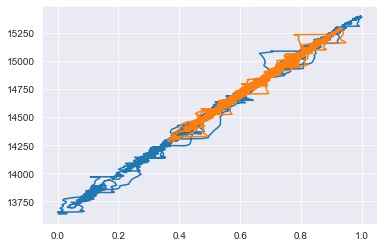

In [63]:
#plotting the predictions
plt.plot(y_train,train_predict_high)
plt.plot(ytest,test_predict_high)

In [64]:
df3 = data.reset_index()['low']

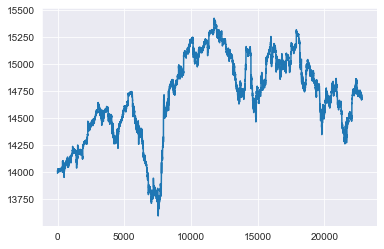

In [65]:
plt.plot(df3)

In [66]:
#GRU is sensitive to the scale of the data, so we apply MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [67]:
##splitting dataset into train and test split
training_size=int(len(df3)*0.65)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df2),:1]

In [68]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [70]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='SGD',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
99/99 [==============================] - 99s 579ms/step - loss: 0.1024
Epoch 2/50
99/99 [==============================] - 62s 625ms/step - loss: 0.0375
Epoch 3/50
99/99 [==============================] - 65s 654ms/step - loss: 0.0226
Epoch 4/50
99/99 [==============================] - 63s 639ms/step - loss: 0.0108
Epoch 5/50
99/99 [==============================] - 64s 650ms/step - loss: 0.0060
Epoch 6/50
99/99 [==============================] - 65s 654ms/step - loss: 0.0043
Epoch 7/50
99/99 [==============================] - 65s 658ms/step - loss: 0.0040
Epoch 8/50
99/99 [==============================] - 62s 629ms/step - loss: 0.0039
Epoch 9/50
99/99 [==============================] - 62s 627ms/step - loss: 0.0035
Epoch 10/50
99/99 [==============================] - 63s 638ms/step - loss: 0.0035
Epoch 11/50
99/99 [==============================] - 60s 611ms/step - loss: 0.0033
Epoch 12/50
99/99 [==============================] - 62s 625ms/step - loss: 0.0031
Epoch 13/50
9

In [73]:
### Lets Do the prediction and check performance metrics
train_predict_low=regressorGRU.predict(X_train)
test_predict_low=regressorGRU.predict(X_test)

In [74]:
##Transformback to original form
train_predict_low=scaler.inverse_transform(train_predict_low)
test_predict_low=scaler.inverse_transform(test_predict_low)

In [75]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_low))

14631.348607714352

In [76]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict_low))

14831.300372939906

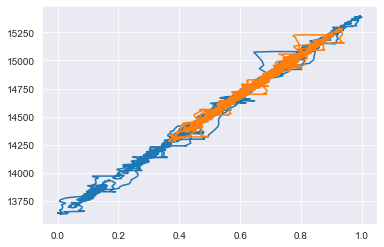

In [77]:
#plotting the predictions
plt.plot(y_train,train_predict_low)
plt.plot(ytest,test_predict_low)

# Thank you!